<a href="https://colab.research.google.com/github/webjjang/data_anal/blob/main/ml_ch13_part2_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

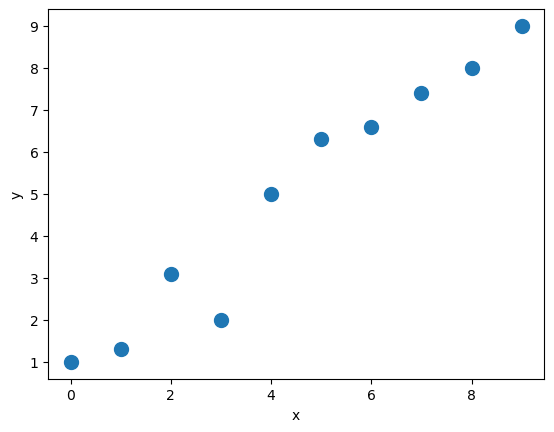

In [ ]:
# Í∞ÑÎã®Ìïú Îç∞Ïù¥ÌÑ∞ ÏÖã ÎßåÎì§Í∏∞ÏôÄ ÏãúÍ∞ÅÌôî

# 0~9ÍπåÏßÄÏùò Ïà´ÏûêÎ•º ÎßåÎì§Ïñ¥ 2Ï∞® ÌñâÎ†¨Î°ú ÎßåÎì¨.
X_train = np.arange(10).reshape((10, 1))
# yÏùò Í∞íÏùÑ 1~9 ÏÇ¨Ïù¥Ïùò Í∞í - ÏÑ†ÌòïÏù¥ ÎêòÎèÑÎ°ù ÏÑ∏ÌåÖ
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('images/13_5.png', dpi=300)
plt.show()

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í∞íÏùò ÌëúÏ§ÄÌôîÏôÄ tfÏùò Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞

# XÏùò Í∞íÎì§Ïóê ÎåÄÌï¥ ÌëúÏ§ÄÌôî(ÌèâÍ∑†Ïù¥ 0, ÌëúÏ§Ä Ìé∏Ï∞®Í∞Ä 1) Í∞íÏùÑ Íµ¨Ìï®.
"""
X_train: ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ (Ïòà: Ïù¥ÎØ∏ÏßÄ, ÌäπÏÑ± Î≤°ÌÑ∞ Îì±)
np.mean(X_train): Ï†ÑÏ≤¥ ÌèâÍ∑†
np.std(X_train): Ï†ÑÏ≤¥ ÌëúÏ§ÄÌé∏Ï∞®
‚û°Ô∏è Í∞Å ÌäπÏÑ± Í∞íÏùÑ ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú ÎßûÏ∂îÎäî ÌëúÏ§ÄÌôî (Standardization) ÏûëÏóÖÏûÖÎãàÎã§.
"""
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

print(X_train)
print(X_train_norm)
"""
from_tensor_slices(...): NumPy Î∞∞Ïó¥ÏùÑ TensorFlow Dataset Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
tf.cast(..., tf.float32): ÏûêÎ£åÌòïÏùÑ float32Î°ú Î≥ÄÌôò (Î™®Îç∏ ÌïôÏäµÏóê Ï†ÅÌï©Ìïú ÌòïÏãù)
‚û°Ô∏è Ïù¥Î†áÍ≤å ÎßåÎì† ds_train_origÎäî Keras Î™®Îç∏ ÌïôÏäµ Ïãú model.fit()Ïóê ÏßÅÏ†ë ÎÑ£ÏùÑ Ïàò ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌååÏù¥ÌîÑÎùºÏù∏Ïù¥ Îê©ÎãàÎã§.
orig - original : ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÖã
"""
ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))
print(ds_train_orig)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
<_TensorSliceDataset element_spec=(TensorSpec(shape=(1,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>


In [ ]:
# Í∏∞Í≥ÑÌïôÏäµ Î™®Îç∏ ÎßåÎì§Í∏∞ÏôÄ Ï¥àÍ∏∞ÌôîÏãúÌÇ§Í≥† Íµ¨Ï°∞ ÌôïÏù∏ÌïòÍ∏∞

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        """
        ÌïòÏßÄÎßå Ïó¨Í∏∞ÏÑú Ï§ëÏöîÌïú Ï†ê: tf.VariableÏùÑ ÏßÅÏ†ë ÏÇ¨Ïö©Ìï† Í≤ΩÏö∞,
        model.summary()Îäî ÏïÑÎ¨¥ ÎÇ¥Ïö©ÎèÑ Ï∂úÎ†•ÌïòÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

        ‚ùóÔ∏èÏù¥Ïú†: tf.VariableÏùÄ Keras Î†àÏù¥Ïñ¥Í∞Ä ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏
        KerasÏùò summary()Îäî ÎÇ¥Î∂ÄÏóê tf.keras.layers.LayerÎ•º Ìè¨Ìï®Ìï† ÎïåÎßå
        Íµ¨Ï°∞(ÏûÖÎ†•, Ï∂úÎ†•, ÌååÎùºÎØ∏ÌÑ∞ Ïàò)Î•º Î≥¥Ïó¨Ï§çÎãàÎã§.

        ÎãπÏã†Ïùò Î™®Îç∏ÏóêÎäî Dense Í∞ôÏùÄ Î†àÏù¥Ïñ¥Í∞Ä ÏóÜÍ≥†, Í∑∏ÎÉ• tf.VariableÎßå ÏûàÏñ¥ÏÑú
        ÏïÑÎûòÏ≤òÎüº Ï∂úÎ†•Îê† Ïàò ÏûàÏäµÎãàÎã§:
        """
        # self.w = tf.Variable(0.0, name='weight')
        # bias - Ìé∏Ìñ•, Ìé∏Í≤¨
        # self.b = tf.Variable(0.0, name='bias')

        # add_weightÎ•º ÏÇ¨Ïö©ÌïòÏó¨ KerasÍ∞Ä Ï∂îÏ†Å Í∞ÄÎä•Ìïú Í∞ÄÏ§ëÏπòÎ°ú Îì±Î°ù
        self.w = self.add_weight(shape=(1,), initializer='zeros', trainable=True, name='weight')
        self.b = self.add_weight(shape=(1,), initializer='zeros', trainable=True, name='bias')

    def call(self, x):
        return self.w*x + self.b


model = MyModel()

model.build(input_shape=(None, 1))
model.summary()

Model: "my_model_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ÏÜêÏã§ÏùÑ Íµ¨ÌïòÎäî Ìï®Ïàò

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


## testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [ ]:
# ÌõàÎ†®ÏãúÌÇ§Îäî Ìï®Ïàò
# ÏÜêÏã§ÏùÑ Íµ¨Ìï¥ÏÑú Í∞ÄÏ§ëÏπòÏôÄ Ï†àÌé∏Ïóê Ï†ÅÏö©ÏãúÌÇ®Îã§.

def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [ ]:
# Í∏∞Í≥ÑÌïôÏäµ Î∞òÎ≥µ ÏãúÌÇ§Í∏∞.

tf.random.set_seed(1)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))


ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('ÏóêÌè¨ÌÅ¨ {:3d} Ïä§ÌÖù {:4d} ÏÜêÏã§ {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

ÏóêÌè¨ÌÅ¨   0 Ïä§ÌÖù    0 ÏÜêÏã§ 43.5600
ÏóêÌè¨ÌÅ¨  10 Ïä§ÌÖù  100 ÏÜêÏã§ 0.7530
ÏóêÌè¨ÌÅ¨  20 Ïä§ÌÖù  200 ÏÜêÏã§ 20.1759
ÏóêÌè¨ÌÅ¨  30 Ïä§ÌÖù  300 ÏÜêÏã§ 23.3976
ÏóêÌè¨ÌÅ¨  40 Ïä§ÌÖù  400 ÏÜêÏã§ 6.3481
ÏóêÌè¨ÌÅ¨  50 Ïä§ÌÖù  500 ÏÜêÏã§ 4.6356
ÏóêÌè¨ÌÅ¨  60 Ïä§ÌÖù  600 ÏÜêÏã§ 0.2411
ÏóêÌè¨ÌÅ¨  70 Ïä§ÌÖù  700 ÏÜêÏã§ 0.2036
ÏóêÌè¨ÌÅ¨  80 Ïä§ÌÖù  800 ÏÜêÏã§ 3.8177
ÏóêÌè¨ÌÅ¨  90 Ïä§ÌÖù  900 ÏÜêÏã§ 0.9416
ÏóêÌè¨ÌÅ¨ 100 Ïä§ÌÖù 1000 ÏÜêÏã§ 0.7035
ÏóêÌè¨ÌÅ¨ 110 Ïä§ÌÖù 1100 ÏÜêÏã§ 0.0348
ÏóêÌè¨ÌÅ¨ 120 Ïä§ÌÖù 1200 ÏÜêÏã§ 0.5404
ÏóêÌè¨ÌÅ¨ 130 Ïä§ÌÖù 1300 ÏÜêÏã§ 0.1170
ÏóêÌè¨ÌÅ¨ 140 Ïä§ÌÖù 1400 ÏÜêÏã§ 0.1195
ÏóêÌè¨ÌÅ¨ 150 Ïä§ÌÖù 1500 ÏÜêÏã§ 0.0944
ÏóêÌè¨ÌÅ¨ 160 Ïä§ÌÖù 1600 ÏÜêÏã§ 0.4670
ÏóêÌè¨ÌÅ¨ 170 Ïä§ÌÖù 1700 ÏÜêÏã§ 2.0695
ÏóêÌè¨ÌÅ¨ 180 Ïä§ÌÖù 1800 ÏÜêÏã§ 0.0020
ÏóêÌè¨ÌÅ¨ 190 Ïä§ÌÖù 1900 ÏÜêÏã§ 0.3612


ÏµúÏ¢Ö ÌååÎùºÎØ∏ÌÑ∞: [2.6576622] [4.8798566]


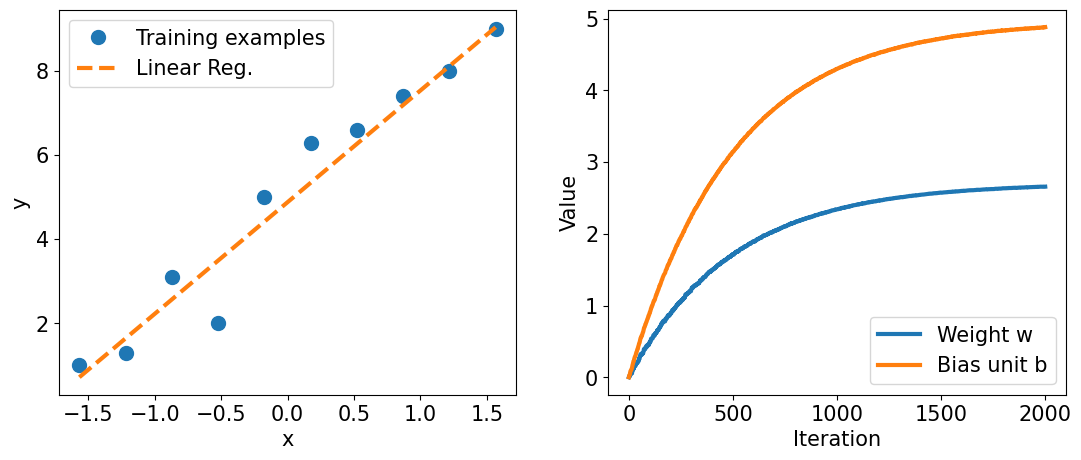

In [ ]:
# Í∏∞Í≥ÑÌïôÏäµÌïú Í≤∞Í≥º Ï∂úÎ†•ÌïòÍ∏∞
# ÏúÑÏóê Í∏∞Í≥ÑÌïôÏäµ ÏΩîÎìúÎ•º Ïó¨Îü¨Î≤à Ïã§ÌñâÌïòÎ©¥ Ï§ëÍ∞Ñ Îã®Í≥ÑÏùò ÌïôÏäµ Í≤∞Í≥ºÎßå Ï∂úÎ†•ÎêòÏñ¥ Í∑∏ÎûòÌîÑÍ∞Ä Îã¨ÎùºÏßê.

print('ÏµúÏ¢Ö ÌååÎùºÎØ∏ÌÑ∞:', model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# plt.savefig('images/13_6.png', dpi=300)
plt.show()

In [ ]:
# tf.keras.Model ÏùÑ ÏÉÅÏÜçÎ∞õÏïòÏúºÎØÄÎ°ú Ï¥àÍ∏∞Í∞í ÏÑ∏ÌåÖÏùÑ ÏúÑÌïú compile()ÏôÄ
# ÌõàÎ†®Ìï®Ïàò fit()ÏùÑ ÏÇ¨Ïö©Ìï† Ïàò ÏûàÏùå.

tf.random.set_seed(1)
model = MyModel()
#model.build((None, 1))

model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['mae', 'mse'])

In [ ]:
# Î™®Îç∏ ÌõàÎ†® ÏãúÌÇ§Í∏∞.

model.fit(X_train_norm, y_train,
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

Epoch 1/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - loss: 24.1936 - mae: 4.2272 - mse: 24.1936
Epoch 2/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 16.3219 - mae: 3.4892 - mse: 16.3219
Epoch 3/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 11.0623 - mae: 2.8868 - mse: 11.0623
Epoch 4/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 7.5438 - mae: 2.3950 - mse: 7.5438 
Epoch 5/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 5.1866 - mae: 2.0062 - mse: 5.1866 
Epoch 6/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 3.6047 - mae: 1.6925 - mse: 3.6047 
Epoch 7/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 2.5408 - mae: 1.4364 - mse: 2.5408 
Epoch 8/200
10/10 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [ ]:
# ÌõàÎ†®ÏãúÌÇ® Í≤∞Í≥º Í∑∏ÎûòÌîÑÎ°ú Ï∂úÎ†•ÌïòÍ∏∞

print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()

[2.7240849] [4.9556704]


## Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂ÑÎ•òÌïòÎäî Îã§Ï∏µ ÌçºÏÖâÌä∏Î°† ÎßåÎì§Í∏∞

In [ ]:
# tensorflow_datasets Ïùò Î∂ìÍΩÉ Îç∞Ïù¥ÌÑ∞ ÏÖã Î°úÎìúÌïòÍ∏∞
# Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò§ÎäîÎç∞ ÏãúÍ∞ÑÏù¥ Í±∏Î†§ÏÑú Í≤ΩÍ≥†Í∞Ä ÎÇòÏò§ÎäîÎç∞ ÌïúÎ≤à Îçî Ïã§ÌñâÌïòÏÑ∏Ïöî.~~~

import tensorflow_datasets as tfds

iris, iris_info = tfds.load('iris', with_info=True)

print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.1.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_dir='C:\\Users\\webjjang\\tensorflow_datasets\\iris\\2.1.0',
    file_format=tfrecord,
    download_size=3.65 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    nondeterministic_or

In [ ]:
# Í∞ÄÏ†∏Ïò® Îç∞Ïù¥ÌÑ∞Î•º trainÎßå ÏÑ†Î≥ÑÌïòÏó¨ Í∫ºÎÇ¥Ïò§Í∏∞

# ÏÑûÏñ¥ÏÑú 150Í∞úÎ•º Í∫ºÎÇ¥Ïò¥
tf.random.set_seed(1)

ds_orig = iris['train']
print(len(ds_orig))
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

print(next(iter(ds_orig)))

# ÏïûÏóêÏÑú 100Í∞úÎäî ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞Î°ú 50Í∞úÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú Î∂ÑÎ¶¨ Ï†ÄÏû•Ìï®.
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

150
{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


In [ ]:
## ÏÉòÌîå Í∞úÏàò ÌôïÏù∏

# n = 0
# for example in ds_train_orig:
#     n += 1
# print(n)

# n = 0
# for example in ds_test:
#     n += 1
# print(n)

print(len(ds_train_orig))
print(len(ds_test))

100
50


In [ ]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞ ÎßåÎì§Í∏∞

ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

next(iter(ds_train_orig))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

In [ ]:
# iris ÌïôÏäµ Î™®Îç∏ ÎßåÎì§Í∏∞ - Îã§Ï∏µ ÌçºÏÖâÌä∏Î°† Î™®Îç∏(Multi-Layer Perceptron, MLP)
# Ï≤òÏùåÏóê Í≤ΩÍ≥†Í∞Ä ÎÇòÌÉÄÎÇ®

iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid',
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])

"""
üîç ÏÉÅÏÑ∏ ÏÑ§Î™Ö
1Ô∏è‚É£ tf.keras.Sequential([...])
Sequential Î™®Îç∏ÏùÄ Ïó¨Îü¨ Ï∏µÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏåìÎäî Íµ¨Ï°∞ÏûÖÎãàÎã§.

Î≥µÏû°Ìïú Î∂ÑÍ∏∞ÎÇò Î≥ëÎ†¨ Ïó∞Í≤∞ ÏóÜÏù¥ Îã®ÏàúÌïú feed-forward ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÎßåÎì§ Îïå ÏÇ¨Ïö©Ìï©ÎãàÎã§.

2Ô∏è‚É£ Dense(16, activation='sigmoid', name='fc1', input_shape=(4,))
üî∏ Dense Î†àÏù¥Ïñ¥
ÏôÑÏ†Ñ Ïó∞Í≤∞Ï∏µ (fully connected layer, FC).

Ïù¥ Î†àÏù¥Ïñ¥Îäî ÏûÖÎ†•Í∞íÏóê ÎåÄÌï¥ Í∞ÄÏ§ëÏπò Í≥±Í≥º Ìé∏Ìñ•ÏùÑ ÎçîÌïú ÌõÑ, **ÎπÑÏÑ†Ìòï Ìï®Ïàò(sigmoid)**Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.

üî∏ ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Î™Ö
ÏÜçÏÑ±	ÏÑ§Î™Ö
16	Ï∂úÎ†• Îâ¥Îü∞ Ïàò ‚Üí Ïù¥ Î†àÏù¥Ïñ¥Ïùò Ï∂úÎ†•ÏùÄ shape (None, 16)
activation='sigmoid'	ÏãúÍ∑∏Î™®Ïù¥Îìú ÎπÑÏÑ†Ìòï ÌôúÏÑ±Ìôî Ìï®Ïàò ÏÇ¨Ïö© ‚Üí 0~1 Î≤îÏúÑ
name='fc1'	Ïù¥ Î†àÏù¥Ïñ¥Ïóê ÎåÄÌïú Î™ÖÏπ≠ (Î™®Îç∏ summaryÏóê ÌëúÏãúÎê®)
input_shape=(4,)	ÏûÖÎ†• Î≤°ÌÑ∞Îäî 4Í∞úÏùò Ïã§Ïàò Í∞í (Iris ÌäπÏÑ±: ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥, ÍΩÉÎ∞õÏπ® ÎÑàÎπÑ, ÍΩÉÏûé Í∏∏Ïù¥, ÍΩÉÏûé ÎÑàÎπÑ Îì±)

üî∏ ÌååÎùºÎØ∏ÌÑ∞ Ïàò
Í∞ÄÏ§ëÏπò: 4(inputs) * 16(outputs) = 64

Ìé∏Ìñ•: 16

Ï¥ù: 64 + 16 = 80Í∞ú

3Ô∏è‚É£ Dense(3, name='fc2', activation='softmax')
üî∏ Ï∂úÎ†•Ï∏µ (Output Layer)
3Í∞úÏùò ÎÖ∏Îìú: IrisÏùò 3Í∞ú ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•† Ï∂úÎ†•

Ïòà: setosa, versicolor, virginica

activation='softmax': Í∞Å ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌôïÎ•†ÏùÑ ÎÇòÌÉÄÎÇ¥Î©∞, Ï†ÑÏ≤¥ Ìï©ÏùÄ 1

üî∏ ÌååÎùºÎØ∏ÌÑ∞ Ïàò
Í∞ÄÏ§ëÏπò: 16(inputs) * 3(outputs) = 48

Ìé∏Ìñ•: 3

Ï¥ù: 48 + 3 = 51Í∞ú

üìä Ï†ÑÏ≤¥ ÏöîÏïΩ
Î†àÏù¥Ïñ¥ Ïù¥Î¶Ñ	Ï∂úÎ†• Shape	ÌååÎùºÎØ∏ÌÑ∞ Ïàò	ÎπÑÍ≥†
fc1 (Dense)	(None, 16)	80	ÏãúÍ∑∏Î™®Ïù¥Îìú ÌôúÏÑ±Ìôî
fc2 (Dense)	(None, 3)	51	ÏÜåÌîÑÌä∏Îß•Ïä§ ÌôúÏÑ±Ìôî
Ï¥ùÌï©		131	Î™®Îëê ÌïôÏäµ Í∞ÄÎä•

üß† Î™®Îç∏Ïùò Î™©Ï†Å
Ïù¥ Î™®Îç∏ÏùÄ Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò(multi-class classification)Î•º ÏúÑÌïú Í≤ÉÏûÖÎãàÎã§. ÌäπÌûà:

ÏûÖÎ†•: 4Í∞úÏùò Ïó∞ÏÜçÌòï ÌäπÏÑ± (Iris Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ±)
Ï∂úÎ†•: Í∞Å ÏÉòÌîåÏóê ÎåÄÌï¥ 3Í∞ú ÌÅ¥ÎûòÏä§ Ï§ë ÌïòÎÇòÏùò ÌôïÎ•† Î∂ÑÌè¨

ÏÜêÏã§ Ìï®ÏàòÎ°úÎäî ÏùºÎ∞òÏ†ÅÏúºÎ°ú categorical_crossentropy ÎòêÎäî sparse_categorical_crossentropyÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
"""

iris_model.summary()

Model: "sequential_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ fc1 (Dense)                          ‚îÇ (None, 16)                  ‚îÇ              80 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ fc2 (Dense)                          ‚îÇ (None, 3)                   ‚îÇ              51 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# ÌïôÏäµ Î™®Îç∏ Ï¥àÍ∏∞Ìôî
#iris_modelÏùÑ ÌïôÏäµÌïòÍ∏∞ ÏúÑÌïú Ï§ÄÎπÑ Îã®Í≥ÑÎ°ú, Î™®Îç∏Ïùò ÌïôÏäµ Î∞©ÏãùÍ≥º ÌèâÍ∞Ä ÏßÄÌëúÎ•º Ï†ïÏùò
"""
üîç ÏÉÅÏÑ∏ ÏÑ§Î™Ö
1Ô∏è‚É£ optimizer='adam'
Adam ÏòµÌã∞ÎßàÏù¥Ï†ÄÎäî ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ï(SGD)Ïùò Î≥ÄÌòï Ï§ë ÌïòÎÇòÎ°ú, Ï†ÅÏùëÌòï ÌïôÏäµÎ•†ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÑ±Îä•Ïù¥ Ï¢ãÍ≥† Îã§ÏñëÌïú Î¨∏Ï†úÏóê Ïûò ÏûëÎèôÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Í∏∞Î≥∏Í∞íÏ≤òÎüº ÏûêÏ£º ÏÇ¨Ïö©Îê©ÎãàÎã§.
ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú momentumÍ≥º RMSpropÏùÑ Í≤∞Ìï©Ìïú ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§.

2Ô∏è‚É£ loss='sparse_categorical_crossentropy'
Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú ÏÇ¨Ïö©ÌïòÎäî ÏÜêÏã§ Ìï®ÏàòÏûÖÎãàÎã§.
sparse_Í∞Ä Î∂ôÏùÄ Ïù¥Ïú†:
Ï†ïÎãµ Î†àÏù¥Î∏îÏù¥ Ï†ïÏàò ÌòïÌÉú (Ïòà: [0, 1, 2])Ïùº Îïå ÏÇ¨Ïö©Ìï©ÎãàÎã§.
ÎßåÏïΩ Ï†ïÎãµÏù¥ one-hot Ïù∏ÏΩîÎî©(Ïòà: [1, 0, 0]) ÌòïÌÉúÎùºÎ©¥ categorical_crossentropyÎ•º ÏÇ¨Ïö©Ìï¥Ïïº Ìï©ÎãàÎã§.
Iris Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú ÏùºÎ∞òÏ†ÅÏúºÎ°ú y = [0, 1, 2] Í∞ôÏùÄ Ï†ïÏàò Î†àÏù¥Î∏îÏùÑ ÏÇ¨Ïö©ÌïòÎØÄÎ°ú sparse_ Î≤ÑÏ†ÑÏù¥ Ï†ÅÏ†àÌï©ÎãàÎã§.

3Ô∏è‚É£ metrics=['accuracy']
Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëúÎ°ú Ï†ïÌôïÎèÑ(accuracy) Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
ÏòàÏ∏°Í∞í Ï§ë Ï†ïÎãµÍ≥º ÏùºÏπòÌïú ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

üéØ Ï†ÑÏ≤¥ ÏùòÎØ∏
Ïù¥ compile() ÏΩîÎìúÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÏùòÎØ∏ÏûÖÎãàÎã§:
"Adam ÏµúÏ†ÅÌôîÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú, Ï†ïÏàò Î†àÏù¥Î∏îÏùÑ ÏúÑÌïú Î∂ÑÎ•ò ÏÜêÏã§(sparse categorical crossentropy)ÏùÑ Ï§ÑÏù¥Îäî Î∞©Ìñ•ÏúºÎ°ú ÌïôÏäµÌïòÍ≥†, ÌõàÎ†® Î∞è ÌèâÍ∞Ä Í≥ºÏ†ïÏóêÏÑú Ï†ïÌôïÎèÑÎ•º Î™®ÎãàÌÑ∞ÎßÅÌïòÍ≤†Îã§."
"""
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
# 100Í∞úÏùò ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Î°ú Í∏∞Í≥ÑÌïôÏäµ ÏßÑÌñâÌïòÍ≥† Í≤∞Í≥º Î∞î

num_epochs = 100
training_size = 100
batch_size = 2
# Î∞òÎ≥µ Îã®Í≥ÑÎäî Ï†ïÏàò ÌÉÄÏûÖÏù¥Ïó¨Ïïº ÌïòÎäîÎç∞ ÎÇòÎàÑÍ∏∞Î•º ÌïòÎ©¥ Ïã§Ïàò ÌÉÄÏûÖÏù¥ Îê®.
steps_per_epoch = int(np.ceil(training_size / batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose=0)


In [ ]:
# ÌõàÎ†® Í≤∞Í≥º Í∑∏ÎûòÍ∑∏ Ï∂úÎ†•

hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('images/13_7.png', dpi=300)
plt.show()

In [ ]:
# ÌõàÎ†®Îêú Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞

results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('ÌÖåÏä§Ìä∏ ÏÜêÏã§: {:.4f}   ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: {:.4f}'.format(*results))

ÌÖåÏä§Ìä∏ ÏÜêÏã§: 0.1435   ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.9600


In [ ]:
# ÌõàÌé∏Îêú Î™®Îç∏ Ï†ÄÏû•ÌïòÍ∏∞

# iris_model.save('iris-classifier.h5',
#                 overwrite=True,
#                 include_optimizer=True,
#                 save_format='h5')

# keras 3 ÏóêÏÑú Ï†ÄÏû• Î∞©ÏãùÏù¥ Îã¨ÎùºÏßê.
# Keras 3Î∂ÄÌÑ∞Îäî save_format Ïù∏ÏûêÍ∞Ä Îçî Ïù¥ÏÉÅ ÌïÑÏöîÌïòÏßÄ ÏïäÍ≥†, ÌååÏùº ÌôïÏû•ÏûêÏóê Îî∞Îùº ÏûêÎèôÏúºÎ°ú Ï†ÄÏû• ÌòïÏãùÏù¥ Í≤∞Ï†ï
"""
üîÅ Ï∞∏Í≥†: Keras 3 Ï†ÄÏû• Î∞©Ïãù ÏöîÏïΩ
ÌååÏùºÎ™Ö Ïòà	Ï†ÄÏû• ÌòïÏãù	ÎπÑÍ≥†
'model.keras' - Keras v3 Ï†ÑÏö© Ìè¨Îß∑ / Í∂åÏû• (ÎØ∏Îûò Ìò∏Ìôò)
'model.h5' - HDF5 (Keras v2 Ìò∏Ìôò) / Ìò∏ÌôòÏÑ± Î™©Ï†Å
'model'(ÌôïÏû•Ïûê ÏóÜÏùå) - SavedModel ÎîîÎ†âÌÑ∞Î¶¨ / TF ÏÑúÎπô Îì±ÏóêÏÑú ÏÇ¨Ïö©
"""

iris_model.save('iris-classifier.keras',
                overwrite=True,
                include_optimizer=True)


In [ ]:
# Ï†ÄÏû•Îêú ÌõàÎ†®Îêú ÌõàÎ†® Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞ - 2Î≤à Ïã§ÌñâÌïòÏÑ∏Ïöî

iris_model_new = tf.keras.models.load_model('iris-classifier.keras')

iris_model_new.summary()

Model: "sequential_5"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ fc1 (Dense)                          ‚îÇ (None, 16)                  ‚îÇ              80 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ fc2 (Dense)                          ‚îÇ (None, 3)                   ‚îÇ              51 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 264 (1.04 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 133 (536.00 B)

## ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©ÌïòÍ∏∞

In [ ]:
# ÌõàÎ†®Îêú Î™®Îç∏ ÏÇ¨Ïö©ÌïòÍ∏∞

# ÏòàÏãú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞: ÍΩÉÎ∞õÏπ® Í∏∏Ïù¥/ÎÑàÎπÑ, ÍΩÉÏûé Í∏∏Ïù¥/ÎÑàÎπÑ
# Ïòà: [5.1, 3.5, 1.4, 0.2]Îäî setosaÎ°ú Î∂ÑÎ•òÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # setosa
    [6.0, 2.2, 4.0, 1.0],  # versicolor
    [6.3, 3.3, 6.0, 2.5]   # virginica
], dtype=np.float32)

# ÏòàÏ∏°
predictions = iris_model_new.predict(new_samples)

# ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
for i, probs in enumerate(predictions):
    predicted_class = np.argmax(probs)
    print(f"ÏÉòÌîå {i+1}: ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ = {predicted_class}, ÌôïÎ•† Î∂ÑÌè¨ = {probs}")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 73ms/step
ÏÉòÌîå 1: ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ = 0, ÌôïÎ•† Î∂ÑÌè¨ = [9.925505e-01 7.446777e-03 2.705976e-06]
ÏÉòÌîå 2: ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ = 1, ÌôïÎ•† Î∂ÑÌè¨ = [0.02471963 0.923719   0.0515614 ]
ÏÉòÌîå 3: ÏòàÏ∏°Îêú ÌÅ¥ÎûòÏä§ = 2, ÌôïÎ•† Î∂ÑÌè¨ = [6.6757195e-05 3.6790568e-02 9.6314269e-01]
